In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd

from geovoronoi import coords_to_points, points_to_coords, voronoi_regions_from_coords
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area


In [3]:
N_POINTS = 100
COUNTRY = 'Spain'

np.random.seed(123)

print('loading country `%s` from naturalearth_lowres' % COUNTRY)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
area = world[world.name == COUNTRY]

loading country `Spain` from naturalearth_lowres


In [4]:
CONTINENT = 'Europe'

np.random.seed(123)

print('loading continent `%s` from naturalearth_lowres' % CONTINENT)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
area = world[world.continent == CONTINENT]

loading continent `Europe` from naturalearth_lowres


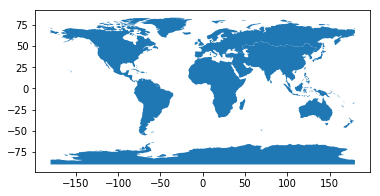

In [6]:
world.geometry
continents = world.dissolve(by='continent')
continents.plot()

In [7]:
continents.geometry

continent
Africa                     (POLYGON ((49.54351891459575 -12.4698328589405...
Antarctica                 (POLYGON ((-159.2081835601977 -79.497059421708...
Asia                       (POLYGON ((120.7156087586305 -10.2395813940878...
Europe                     (POLYGON ((-52.55642473001839 2.50470530843705...
North America              (POLYGON ((-61.68000000000001 10.76, -61.105 1...
Oceania                    (POLYGON ((173.0203747907408 -40.9190524228564...
Seven seas (open ocean)    POLYGON ((68.935 -48.62500000000001, 69.58 -48...
South America              (POLYGON ((-68.63401022758316 -52.636370458874...
Name: geometry, dtype: object

In [8]:
area.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


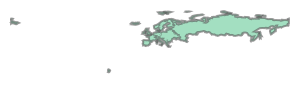

In [9]:
continents = world.dissolve(by='continent', aggfunc='sum').reset_index()
europe = continents[continents['continent'] == 'Europe']
europe

area_shape = europe.iloc[0].geometry
area_shape

In [10]:
print('CRS:', area.crs)

CRS: {'init': 'epsg:4326'}


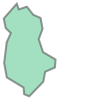

In [11]:
area_shape = area.iloc[0].geometry
area_shape

In [12]:
area_shape.bounds

(19.304486118250793, 39.62499766698397, 21.0200403174764, 42.68824738216557)

In [13]:
import pandas as pd
df = pd.read_csv('data/destinations.csv')
df.head(1)

,CarrierCode,DepartureStation,ArrivalStation,airport_dep,city_dep,country_dep,latitude_dep,longitude_dep,continent_dep,airport_arr,city_arr,country_arr,latitude_arr,longitude_arr,continent_arr
0,FR,AAL,STN,AAL,Aalborg,Denmark,57.09277,9.84916,EU,STN,London,United Kingdom,51.884998,0.235,EU


In [14]:
country_dep = list(df['country_dep'].unique())
print(country_dep)

['Denmark', 'Spain', 'Morocco', 'Italy', 'Germany', 'Greece', 'United Kingdom', 'France', 'Czech Republic', 'Switzerland', 'Slovakia', 'Hungary', 'Poland', 'Belgium', 'Ireland', 'Netherlands', 'Portugal', 'Sweden', 'Austria', 'Norway', 'Ukraine', 'Lithuania', 'Luxembourg', 'Malta', 'Romania', 'Croatia', 'Bulgaria', 'Cyprus', 'Latvia', 'Montenegro', 'Finland', 'Estonia', 'Israel', 'Serbia']


FROM_COUNTRY: United Kingdom
24


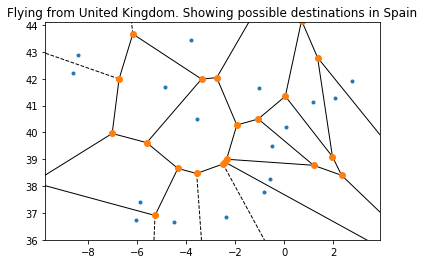

In [15]:
%matplotlib inline


def user_from_country(FROM_COUNTRY):
    
    print("FROM_COUNTRY: {}".format(FROM_COUNTRY))

    #FROM_COUNTRY = 'Switzerland'
    MAP_COUNTRY = 'Spain'

    np.random.seed(123)

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    area = world[world.name == MAP_COUNTRY]
    area_shape = area.iloc[0].geometry


    foo_df = pd.read_csv('data/destinations.csv')
    foo_df = foo_df.groupby(['airport_dep','airport_arr']).first().reset_index()
    #Suponemos un visitantes de UK
    foo_df = foo_df[foo_df['country_dep'] == FROM_COUNTRY]
    #Suponemos que aun no tiene elegido destino
    # Queremos un listado de aeropuertos de destino únicos
    # Ahora nos centraremos temporalmente en los SP
    foo_df = foo_df[foo_df['country_arr'] == MAP_COUNTRY]
    foo_df = foo_df.groupby(['airport_arr']).first().reset_index()[['longitude_arr','latitude_arr']]

    coords = foo_df.values
    coords = coords.tolist()
    print(len(coords))

    out = [p.within(area_shape) for p in coords_to_points(coords)] 
    foo_df = foo_df[np.array(out)].copy()
    coords = foo_df.values
    pts = [p for p in coords_to_points(coords) if p.within(area_shape)] 

    if len(coords) > 2:
        
        from scipy.spatial import Voronoi, voronoi_plot_2d
        
        ax = plt.subplot()
        ax.set_title('Flying from %s. Showing possible destinations in %s' % (FROM_COUNTRY, MAP_COUNTRY))
        voronoi_plot_2d(Voronoi(coords), ax)
        plt.show()

        #voronoi_plot_2d(Voronoi(coords))
        #plt.show()

        return
        poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape)

        fig, ax = subplot_for_map()

        plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords, poly_to_pt_assignments, points_markersize=17)
        #plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords)   # monocolor

        ax.set_title('Flying from %s. Showing possible destinations in %s' % (FROM_COUNTRY, MAP_COUNTRY))

        plt.tight_layout()
        #plt.savefig('random_points_across_italy.png')
        plt.show()


    
#user_from_country('United Kingdom')
user_from_country('United Kingdom')

['Denmark', 'Spain', 'Morocco', 'Italy', 'Germany', 'Greece', 'United Kingdom', 'France', 'Czech Republic', 'Switzerland', 'Slovakia', 'Hungary', 'Poland', 'Belgium', 'Ireland', 'Netherlands', 'Portugal', 'Sweden', 'Austria', 'Norway', 'Ukraine', 'Lithuania', 'Luxembourg', 'Malta', 'Romania', 'Croatia', 'Bulgaria', 'Cyprus', 'Latvia', 'Montenegro', 'Finland', 'Estonia', 'Israel', 'Serbia']
FROM_COUNTRY: Denmark
8


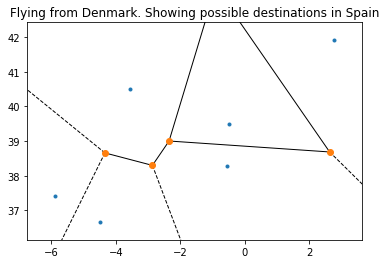

FROM_COUNTRY: Spain
26


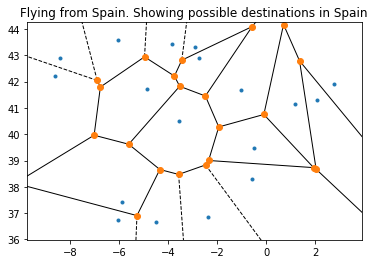

FROM_COUNTRY: Morocco
11


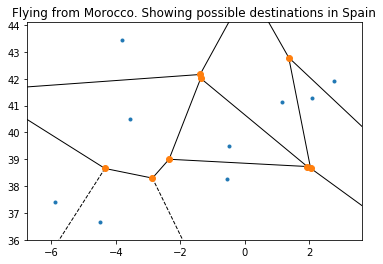

FROM_COUNTRY: Italy
21


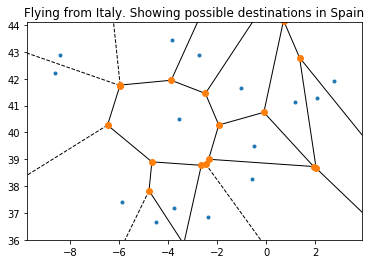

FROM_COUNTRY: Germany
24


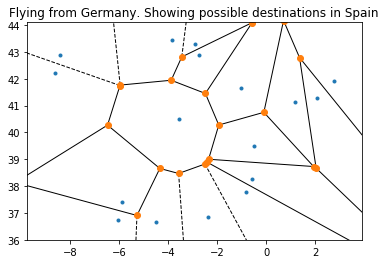

FROM_COUNTRY: Greece
3


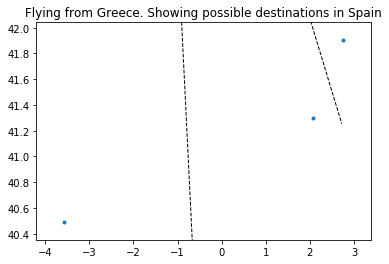

FROM_COUNTRY: United Kingdom
24


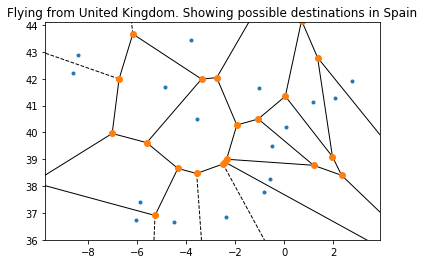

FROM_COUNTRY: France
16


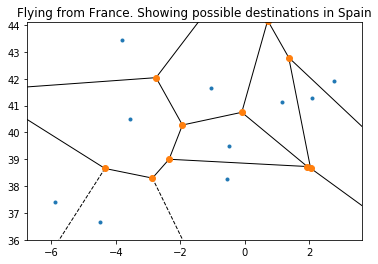

FROM_COUNTRY: Czech Republic
5


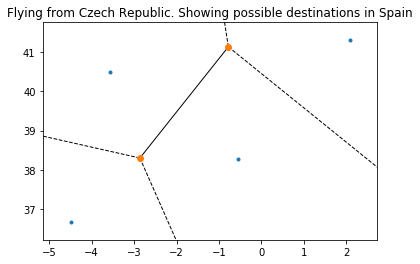

FROM_COUNTRY: Switzerland
1
FROM_COUNTRY: Slovakia
6


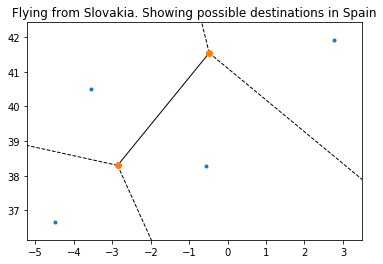

FROM_COUNTRY: Hungary
9


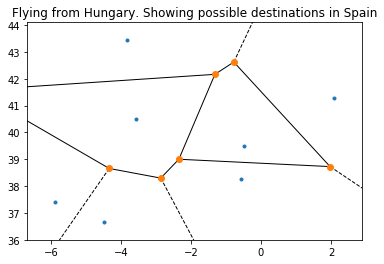

FROM_COUNTRY: Poland
15


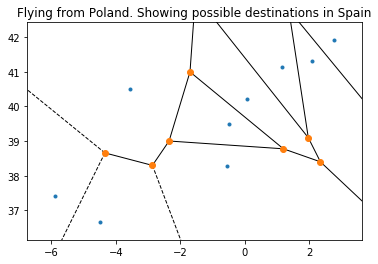

FROM_COUNTRY: Belgium
18


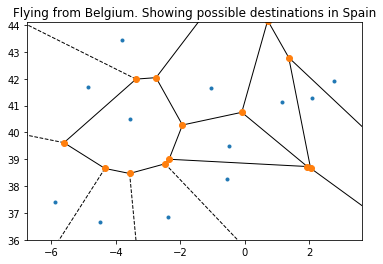

FROM_COUNTRY: Ireland
19


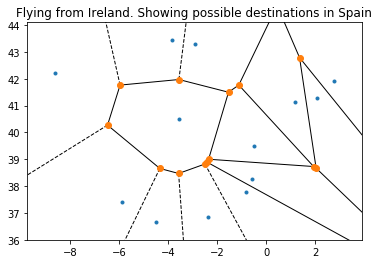

FROM_COUNTRY: Netherlands
13


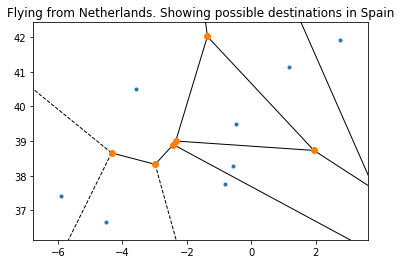

FROM_COUNTRY: Portugal
10


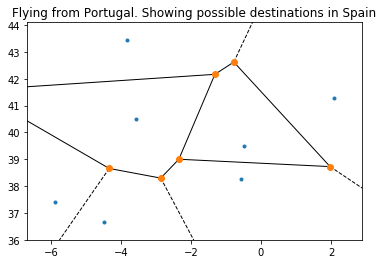

FROM_COUNTRY: Sweden
10


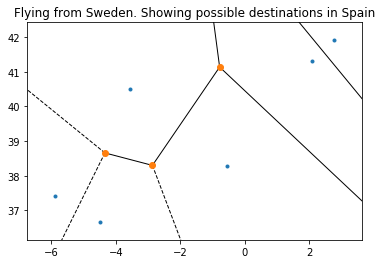

FROM_COUNTRY: Austria
2
FROM_COUNTRY: Norway
9


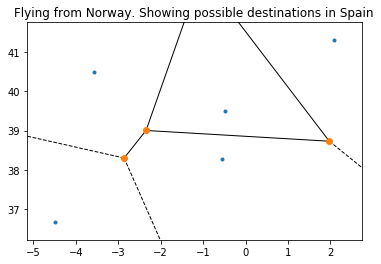

FROM_COUNTRY: Ukraine
3


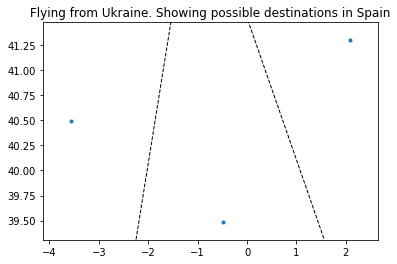

FROM_COUNTRY: Lithuania
5


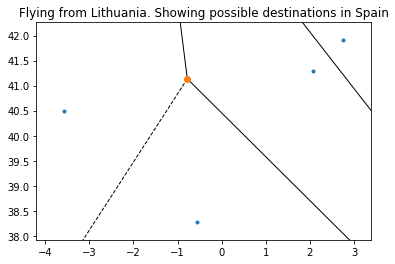

FROM_COUNTRY: Luxembourg
4


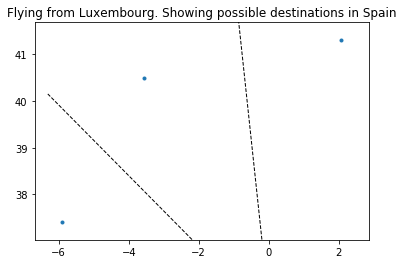

FROM_COUNTRY: Malta
6


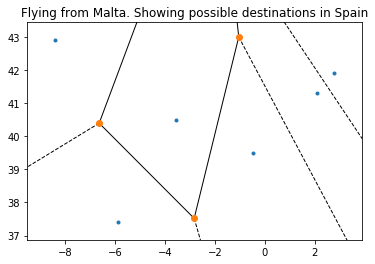

FROM_COUNTRY: Romania
3


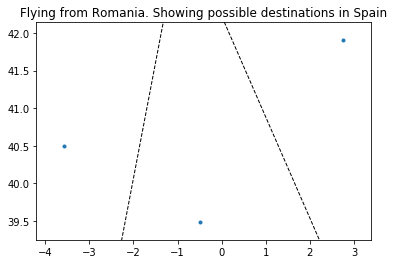

FROM_COUNTRY: Croatia
0
FROM_COUNTRY: Bulgaria
3


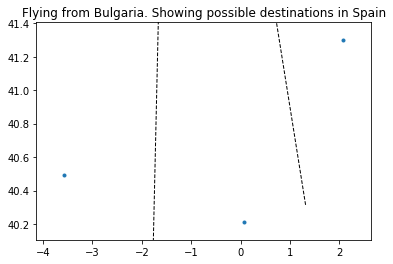

FROM_COUNTRY: Cyprus
1
FROM_COUNTRY: Latvia
2
FROM_COUNTRY: Montenegro
1
FROM_COUNTRY: Finland
4


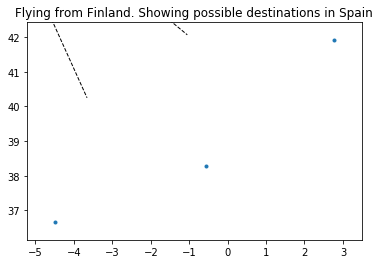

FROM_COUNTRY: Estonia
1
FROM_COUNTRY: Israel
0
FROM_COUNTRY: Serbia
0


In [16]:
country_dep = list(df['country_dep'].unique())
print(country_dep)

for c in country_dep:
    user_from_country(c)

In [356]:
print(country_dep)

['Denmark', 'Spain', 'Morocco', 'Italy', 'Germany', 'Greece', 'United Kingdom', 'France', 'Czech Republic', 'Switzerland', 'Slovakia', 'Hungary', 'Poland', 'Belgium', 'Ireland', 'Netherlands', 'Portugal', 'Sweden', 'Austria', 'Norway', 'Ukraine', 'Lithuania', 'Luxembourg', 'Malta', 'Romania', 'Croatia', 'Bulgaria', 'Cyprus', 'Latvia', 'Montenegro', 'Finland', 'Estonia', 'Israel', 'Serbia']


1
49    POLYGON ((-9.034817674180246 41.88057058365968...
Name: geometry, dtype: object
        minx      miny      maxx       maxy
49 -9.392884  35.94685  3.039484  43.748338


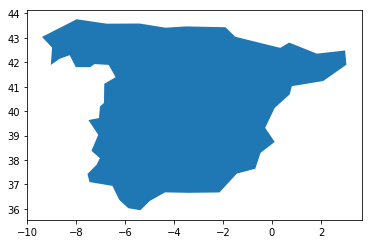

In [377]:
FROM_COUNTRY = 'Switzerland'
MAP_COUNTRY = 'Spain'

np.random.seed(123)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
area = world[world.name == MAP_COUNTRY]


foo_df = pd.read_csv('data/destinations.csv')
foo_df = foo_df.groupby(['airport_dep','airport_arr']).first().reset_index()
#Suponemos un visitantes de UK
foo_df = foo_df[foo_df['country_dep'] == FROM_COUNTRY]
#Suponemos que aun no tiene elegido destino
# Queremos un listado de aeropuertos de destino únicos
# Ahora nos centraremos temporalmente en los SP
foo_df = foo_df[foo_df['country_arr'] == MAP_COUNTRY]
foo_df = foo_df.groupby(['airport_arr']).first().reset_index()[['longitude_arr','latitude_arr']]

coords = foo_df.values
coords = coords.tolist()
print(len(coords))

out = [p.within(area_shape) for p in coords_to_points(coords)] 
foo_df = foo_df[np.array(out)].copy()
coords = foo_df.values
pts = [p for p in coords_to_points(coords) if p.within(area_shape)] 

if len(coords) > 3:
    poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape)

    fig, ax = subplot_for_map()

    plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords, poly_to_pt_assignments, points_markersize=17)
    #plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords)   # monocolor

    ax.set_title('Flying from %s. Showing possible destinations in %s' % (FROM_COUNTRY, MAP_COUNTRY))

    plt.tight_layout()
    #plt.savefig('random_points_across_italy.png')
    plt.show()
    
else:
    fig, ax = subplot_for_map()
    
    print(area.geometry)
    print(area.bounds)
    
    
    area.plot()

    ax.set_title('Flying from %s. Showing possible destinations in %s' % (FROM_COUNTRY, MAP_COUNTRY))


Germany
Spain
24
     CarrierCode DepartureStation ArrivalStation airport_dep    city_dep  \
196           FR              BRE            AGP         BRE      Bremen   
202           FR              CGN            AGP         CGN     Cologne   
206           FR              CSO            AGP         CSO   Magdeburg   
208           FR              DTM            AGP         DTM    Dortmund   
210           FR              DUS            AGP         DUS  Dusseldorf   
211           OE              DUS            AGP         DUS  Dusseldorf   
216           FR              FKB            AGP         FKB       Baden   
217           FR              FMM            AGP         FMM   Memmingen   
218           FR              FMO            AGP         FMO     Munster   
219           FR              FRA            AGP         FRA   Frankfurt   
223           FR              HAM            AGP         HAM     Hamburg   
225           FR              HHN            AGP         HHN   Frankfur

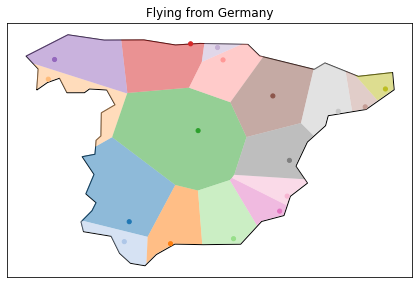

In [322]:
def unknow_destination(FROM, TO, area_shape):
    print(FROM)
    print(TO)
    df = pd.read_csv('data/destinations.csv')
    df = df[df['country_dep'] == FROM]
    if TO:
        df = df[df['country_arr'] == TO]
    print(df['airport_arr'].nunique())
    print(df)
    df = df.groupby(['airport_arr']).first().reset_index()[['longitude_arr','latitude_arr']]
    coords = df.values
    coords = coords.tolist()
    
    from scipy.spatial import Voronoi, voronoi_plot_2d
#    vor = Voronoi(coords)
#    voronoi_plot_2d(vor)
#    print(coords)
    out = [p.within(area_shape) for p in coords_to_points(coords)] 
    df = df[np.array(out)].copy()
    coords = df.values
    pts = [p for p in coords_to_points(coords) if p.within(area_shape)] 
    if len(pts) > 3:
        poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape)

        fig, ax = subplot_for_map()

        plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords, poly_to_pt_assignments, points_markersize=17)
        #plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords)   # monocolor

        ax.set_title('Flying from %s' % ( FROM))

        plt.tight_layout()
        #plt.savefig('random_points_across_italy.png')
        plt.show()
    
unknow_destination('Germany', 'Spain', area_shape)

Denmark
52
[[-4.4991102219, 36.6749000549], [8.29077, 40.632099], [-0.5581560135, 38.2821998596], [23.944499969499997, 37.9364013672], [9.70417, 45.673901], [11.290277481099999, 44.5341682434], [-0.7155560255, 44.8283004761], [19.2555561066, 47.436668396], [2.306319952, 43.2159996033], [19.9116668701, 39.601943969699995], [7.1424999237, 50.8658332825], [24.149444580100003, 35.531665802], [12.594721794100002, 41.7991676331], [4.4538202286, 50.4592018127], [-6.269999980900001, 53.4211120605], [6.7667798996, 51.289501190200006], [-3.3724999427999998, 55.9500007629], [5.3745298386, 51.4500999451], [-7.965909957899999, 37.014400482199996], [12.2530555725, 41.8127784729], [18.4661102295, 54.3774986267], [2.7605500221, 41.901000976999995], [19.784721374500002, 50.0774993896], [24.0848007202, 54.9639015198], [-2.8497200012, 53.3335990906], [-0.36833301189999995, 51.8746986389], [-3.56676, 40.4936], [-2.2749500275, 53.3536987305], [14.477499961900001, 35.8572235107], [5.2214241027999995, 43.439

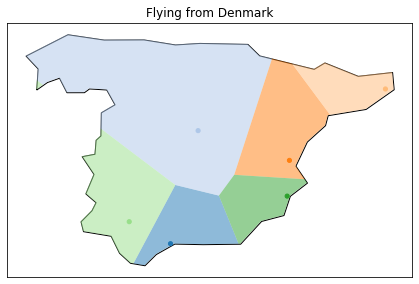

Spain
172
[[10.6194448471, 56.3041648865], [-2.1977798939, 57.2019004822], [-13.6049995422, 28.9452781677], [12.846944809000002, 56.2958335876], [-4.4991102219, 36.6749000549], [8.29077, 40.632099], [-0.5581560135, 38.2821998596], [4.763889789599999, 52.308601379399995], [13.3623, 43.616299], [23.944499969499997, 37.9364013672], [2.0784599781, 41.2971000671], [17.947001, 40.6576], [-6.2158298491999995, 54.6575012207], [9.70417, 45.673901], [-1.7480299472999998, 52.4538993835], [-2.9106099606, 43.3011016846], [9.1517801285, 55.7402992249], [11.290277481099999, 44.5341682434], [-0.7155560255, 44.8283004761], [-1.8424999713999999, 50.7799987793], [8.7866697311, 53.0475006104], [16.7605552673, 41.1383323669], [16.6941661835, 49.1511116028], [-2.7190899849, 51.3827018738], [4.4844398499, 50.9014015198], [7.5291667, 47.59], [17.2124996185, 48.1699981689], [19.2555561066, 47.436668396], [2.1127800941, 49.454399108900006], [17.9776992798, 53.096801757799994], [9.05428, 39.251499], [7.142499923

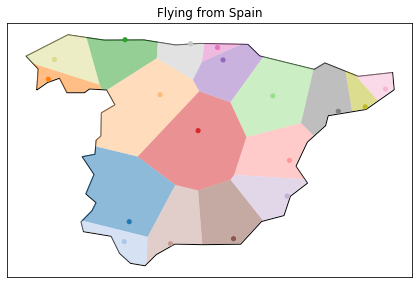

Morocco
73
[[-13.6049995422, 28.9452781677], [-9.413069725, 30.3250007629], [-4.4991102219, 36.6749000549], [-0.5581560135, 38.2821998596], [23.944499969499997, 37.9364013672], [2.0784599781, 41.2971000671], [-4.418540000899999, 48.4478988647], [9.70417, 45.673901], [11.290277481099999, 44.5341682434], [-0.7155560255, 44.8283004761], [8.7866697311, 53.0475006104], [-2.7190899849, 51.3827018738], [4.4844398499, 50.9014015198], [17.2124996185, 48.1699981689], [19.2555561066, 47.436668396], [2.1127800941, 49.454399108900006], [3.1691699027999998, 45.786701202399996], [7.1424999237, 50.8658332825], [12.594721794100002, 41.7991676331], [14.607182, 36.994601], [4.4538202286, 50.4592018127], [15.0661115646, 37.4666671753], [7.62322, 44.547001], [5.435061, 47.042685999999996], [-6.269999980900001, 53.4211120605], [6.7667798996, 51.289501190200006], [4.2963900566, 45.540599823], [-3.3724999427999998, 55.9500007629], [0.5186110139, 44.8252983093], [5.3745298386, 51.4500999451], [-1.3280600309000

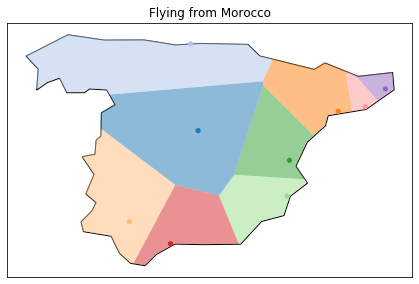

Italy
158
[[-13.6049995422, 28.9452781677], [-9.413069725, 30.3250007629], [-4.4991102219, 36.6749000549], [8.29077, 40.632099], [-0.5581560135, 38.2821998596], [13.3623, 43.616299], [23.944499969499997, 37.9364013672], [2.0784599781, 41.2971000671], [17.947001, 40.6576], [-6.2158298491999995, 54.6575012207], [9.70417, 45.673901], [-1.7480299472999998, 52.4538993835], [9.1517801285, 55.7402992249], [11.290277481099999, 44.5341682434], [-0.7155560255, 44.8283004761], [-1.8424999713999999, 50.7799987793], [8.7866697311, 53.0475006104], [16.7605552673, 41.1383323669], [16.6941661835, 49.1511116028], [-2.7190899849, 51.3827018738], [4.4844398499, 50.9014015198], [17.2124996185, 48.1699981689], [19.2555561066, 47.436668396], [2.1127800941, 49.454399108900006], [9.05428, 39.251499], [19.9116668701, 39.601943969699995], [7.1424999237, 50.8658332825], [24.149444580100003, 35.531665802], [12.594721794100002, 41.7991676331], [14.607182, 36.994601], [28.4883327484, 44.3622207642], [12.6558332443,

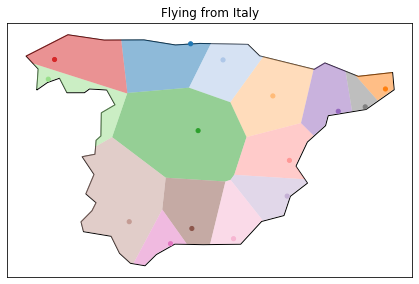

Germany
153
[[-13.6049995422, 28.9452781677], [-9.413069725, 30.3250007629], [-4.4991102219, 36.6749000549], [8.29077, 40.632099], [-0.5581560135, 38.2821998596], [13.3623, 43.616299], [23.944499969499997, 37.9364013672], [2.0784599781, 41.2971000671], [17.947001, 40.6576], [-6.2158298491999995, 54.6575012207], [9.70417, 45.673901], [-1.7480299472999998, 52.4538993835], [-2.9106099606, 43.3011016846], [9.1517801285, 55.7402992249], [11.290277481099999, 44.5341682434], [-0.7155560255, 44.8283004761], [8.7866697311, 53.0475006104], [16.7605552673, 41.1383323669], [16.6941661835, 49.1511116028], [-2.7190899849, 51.3827018738], [4.4844398499, 50.9014015198], [17.2124996185, 48.1699981689], [19.2555561066, 47.436668396], [2.1127800941, 49.454399108900006], [17.9776992798, 53.096801757799994], [3.3538999556999998, 43.323501586899994], [9.05428, 39.251499], [19.9116668701, 39.601943969699995], [7.1424999237, 50.8658332825], [24.149444580100003, 35.531665802], [12.594721794100002, 41.799167633

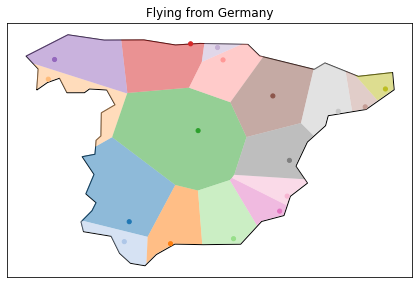

Greece
82
[[23.944499969499997, 37.9364013672], [2.0784599781, 41.2971000671], [9.70417, 45.673901], [-1.7480299472999998, 52.4538993835], [9.1517801285, 55.7402992249], [11.290277481099999, 44.5341682434], [-0.7155560255, 44.8283004761], [-1.8424999713999999, 50.7799987793], [8.7866697311, 53.0475006104], [16.7605552673, 41.1383323669], [-2.7190899849, 51.3827018738], [17.2124996185, 48.1699981689], [19.2555561066, 47.436668396], [2.1127800941, 49.454399108900006], [9.05428, 39.251499], [19.9116668701, 39.601943969699995], [7.1424999237, 50.8658332825], [24.149444580100003, 35.531665802], [12.594721794100002, 41.7991676331], [14.607182, 36.994601], [12.6558332443, 55.6177787781], [4.4538202286, 50.4592018127], [15.0661115646, 37.4666671753], [7.6122398377, 51.5182991028], [-6.269999980900001, 53.4211120605], [6.7667798996, 51.289501190200006], [-3.3724999427999998, 55.9500007629], [20.5005550385, 38.119720459], [5.3745298386, 51.4500999451], [-1.3280600309000001, 52.8311004639], [12.2

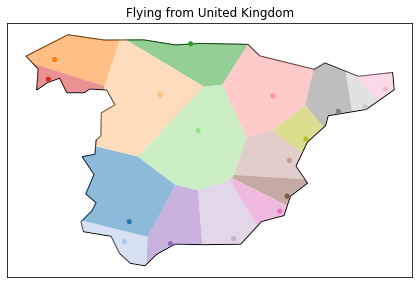

France
115
[[-13.6049995422, 28.9452781677], [-9.413069725, 30.3250007629], [-4.4991102219, 36.6749000549], [8.29077, 40.632099], [-0.5581560135, 38.2821998596], [2.0784599781, 41.2971000671], [17.947001, 40.6576], [-4.418540000899999, 48.4478988647], [9.70417, 45.673901], [-1.7480299472999998, 52.4538993835], [9.1517801285, 55.7402992249], [11.290277481099999, 44.5341682434], [-0.7155560255, 44.8283004761], [16.7605552673, 41.1383323669], [-2.7190899849, 51.3827018738], [17.2124996185, 48.1699981689], [19.2555561066, 47.436668396], [2.1127800941, 49.454399108900006], [3.3538999556999998, 43.323501586899994], [9.05428, 39.251499], [2.306319952, 43.2159996033], [7.1424999237, 50.8658332825], [24.149444580100003, 35.531665802], [12.594721794100002, 41.7991676331], [12.6558332443, 55.6177787781], [4.4538202286, 50.4592018127], [15.0661115646, 37.4666671753], [-3.3433299064999997, 51.3967018127], [7.6122398377, 51.5182991028], [-6.269999980900001, 53.4211120605], [-3.3724999427999998, 55.9

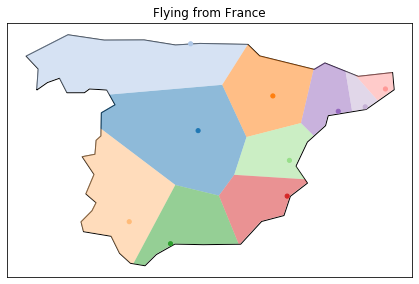

TopologyException: Input geom 0 is invalid: Self-intersection at or near point -0.64520464831380953 37.757122655835175 at -0.64520464831380953 37.757122655835175


Czech Republic
39
[[-4.4991102219, 36.6749000549], [-0.5581560135, 38.2821998596], [23.944499969499997, 37.9364013672], [2.0784599781, 41.2971000671], [9.70417, 45.673901], [9.1517801285, 55.7402992249], [11.290277481099999, 44.5341682434], [-0.7155560255, 44.8283004761], [-1.8424999713999999, 50.7799987793], [8.7866697311, 53.0475006104], [16.7605552673, 41.1383323669], [19.2555561066, 47.436668396], [2.1127800941, 49.454399108900006], [12.594721794100002, 41.7991676331], [12.6558332443, 55.6177787781], [4.4538202286, 50.4592018127], [-6.269999980900001, 53.4211120605], [-3.3724999427999998, 55.9500007629], [5.3745298386, 51.4500999451], [12.2797222137, 57.662776947], [19.784721374500002, 50.0774993896], [-2.8497200012, 53.3335990906], [-3.56676, 40.4936], [-2.2749500275, 53.3536987305], [5.2214241027999995, 43.439271921999996], [11.0780553818, 49.4986114502], [16.911945343, 58.7886123657], [26.103332519499997, 44.573612213100006], [2.7388100624000002, 39.551700591999996], [10.3924999

TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x13f6fbe48>

In [248]:
for c in country_dep:
    unknow_destination(c, area_shape)

Germany
Spain
24
     CarrierCode DepartureStation ArrivalStation airport_dep    city_dep  \
196           FR              BRE            AGP         BRE      Bremen   
202           FR              CGN            AGP         CGN     Cologne   
206           FR              CSO            AGP         CSO   Magdeburg   
208           FR              DTM            AGP         DTM    Dortmund   
210           FR              DUS            AGP         DUS  Dusseldorf   
211           OE              DUS            AGP         DUS  Dusseldorf   
216           FR              FKB            AGP         FKB       Baden   
217           FR              FMM            AGP         FMM   Memmingen   
218           FR              FMO            AGP         FMO     Munster   
219           FR              FRA            AGP         FRA   Frankfurt   
223           FR              HAM            AGP         HAM     Hamburg   
225           FR              HHN            AGP         HHN   Frankfur

ValueError: 'c' argument has 4 elements, which is not acceptable for use with 'x' with size 17, 'y' with size 17.

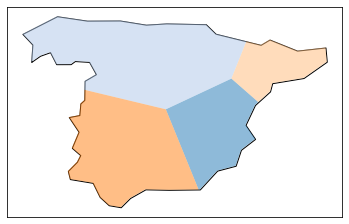

In [265]:
def unknow_destination(FROM, TO, area_shape):
    print(FROM)
    print(TO)
    df = pd.read_csv('data/destinations.csv')
    df = df[df['country_dep'] == FROM]
    if TO:
        df = df[df['country_arr'] == TO]
    print(df['airport_arr'].nunique())
    print(df)
    df = df.groupby(['airport_arr']).first().reset_index()[['longitude_arr','latitude_arr']]
    coords = df.values
    coords = coords.tolist()
    
    from scipy.spatial import Voronoi, voronoi_plot_2d
#    vor = Voronoi(coords)
#    voronoi_plot_2d(vor)
#    print(coords)
    out = [p.within(area_shape) for p in coords_to_points(coords)] 
    df = df[np.array(out)].copy()
    coords = df.values
    pts = [p for p in coords_to_points(coords) if p.within(area_shape)] 
    if len(pts) > 3:
        poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords[0:4], area_shape)

        fig, ax = subplot_for_map()

        plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords, poly_to_pt_assignments, points_markersize=17)
        #plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords)   # monocolor

        ax.set_title('Flying from %s' % ( FROM))

        plt.tight_layout()
        #plt.savefig('random_points_across_italy.png')
        plt.show()
    
unknow_destination('Germany', 'Spain', area_shape)

In [256]:
df[df['country_dep'] == 'Czech Republic'].groupby(['airport_arr']).first().reset_index()[['longitude_arr','latitude_arr']]

,longitude_arr,latitude_arr
0,-4.499110,36.674900
1,-0.558156,38.282200
2,23.944500,37.936401
3,2.078460,41.297100
4,9.704170,45.673901
5,9.151780,55.740299
6,11.290277,44.534168
7,-0.715556,44.828300
8,-1.842500,50.779999
9,8.786670,53.047501


In [220]:
df['airport_dep'].nunique()

249

In [221]:
df['airport_arr'].nunique()

248

In [215]:
#df = df[df['country_arr'] == 'Spain']
df = df.groupby(['airport_arr']).first().reset_index()[['longitude_arr','latitude_arr']]
df.describe()

,longitude_arr,latitude_arr
count,248.000000,248.000000
mean,8.181240,46.261303
std,11.361018,7.413213
min,-27.090799,27.931667
25%,-0.739764,41.222925
50%,8.757390,45.818838
75%,16.374028,51.845076
max,34.935833,64.624725


In [192]:
area_shape.bounds

(-9.392883673530648, 35.946850083961465, 3.0394840836805486, 43.74833771420099)

In [193]:
coords = df.values
print(type(coords))
coords = coords.tolist()
coords[0:3]

<class 'numpy.ndarray'>


[[9.849160000000001, 57.092769999999994],
 [10.6194448471, 56.3041648865],
 [-2.1977798939, 57.2019004822]]

In [194]:
coords_to_points(coords)[7].within(area_shape)

False

In [195]:
out = [p.within(area_shape) for p in coords_to_points(coords)] 
print(out)
np.array(out)

[False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, F

array([False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [196]:
print(len(~np.array(out)))
print(len(np.array(out)))

248
248


In [197]:
np.sum(np.array(out))

21

In [198]:
np.sum(~np.array(out))

227

In [171]:
df = df[np.array(out)].copy()
coords = df.values

In [199]:
pts = [p for p in coords_to_points(coords) if p.within(area_shape)] 
print(pts[0:3])
len(pts)

[<shapely.geometry.point.PointAdapter object at 0x131ee5dd8>, <shapely.geometry.point.PointAdapter object at 0x131ee5c18>, <shapely.geometry.point.PointAdapter object at 0x131edd080>]


21

In [200]:
coords = points_to_coords(pts) 
len(coords)

21

In [201]:
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, area_shape)

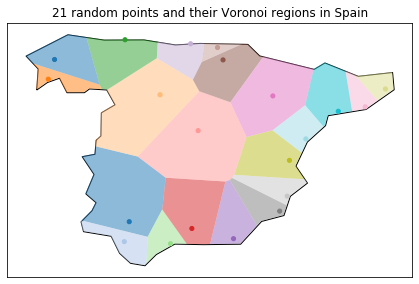

In [204]:
fig, ax = subplot_for_map()

plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords, poly_to_pt_assignments, points_markersize=17)
#plot_voronoi_polys_with_points_in_area(ax, area_shape, poly_shapes, coords)   # monocolor

ax.set_title('%d random points and their Voronoi regions in %s' % (len(pts), COUNTRY))

plt.tight_layout()
#plt.savefig('random_points_across_italy.png')
plt.show()